In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('/')

# Basic summary
print(df.describe())




          Unnamed: 0          id: 0          index              #  \
count  320267.000000  320267.000000  320267.000000  298531.000000   
mean    33170.843621    5032.972226       6.850225      18.173248   
std     20307.633243    3149.441054       4.308321      15.936639   
min         0.000000       0.000000       0.000000       0.000000   
25%     16013.000000    2324.000000       3.000000       8.000000   
50%     32026.000000    4795.000000       7.000000      15.000000   
75%     48607.000000    7612.000000      11.000000      24.000000   
max     78227.000000   11889.000000      21.000000      99.000000   

                 Min            Gls            Ast             PK  \
count  320263.000000  320231.000000  320231.000000  320231.000000   
mean      129.563446       0.179620       0.124504       0.017484   
std       233.147803       0.549502       0.430811       0.137168   
min         1.000000       0.000000       0.000000       0.000000   
25%        45.000000       0.0000

In [88]:

df = pd.read_csv('/Users/ysk/Desktop/fullfutbolcsv/all-csv-player copy.csv', skipinitialspace=True)
print("Raw columns:", df.columns.tolist())


Raw columns: ['Unnamed: 0', 'id: 0', 'index', 'Player', '#', 'Nation', 'Pos', 'Age', 'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR', 'Touches', 'Tkl', 'Int', 'Blocks', 'xG', 'npxG', 'xAG', 'SCA', 'GCA', 'Cmp_x', 'Att_x', 'Cmp%_x', 'PrgP', 'Carries', 'PrgC', 'Att_x.1', 'Succ', 'SoTA', 'GA', 'Saves', 'Save%', 'PSxG', 'Cmp_y', 'Att_y', 'Cmp%_y', 'Att (GK)', 'Thr', 'Launch%', 'AvgLen', 'Att_y.1', 'Launch%.1', 'AvgLen.1', 'Opp', 'Stp', 'Stp%', '#OPA', 'AvgDist', 'home', 'game_id', 'Cmp', 'Att', 'Cmp%', 'Att.1']


In [89]:
# If the first column is empty or named "Unnamed: 0", drop it
if df.columns[0].startswith("Unnamed") or df.columns[0] == '':
    df = df.iloc[:, 1:]

print("Adjusted columns:", df.columns.tolist())


Adjusted columns: ['id: 0', 'index', 'Player', '#', 'Nation', 'Pos', 'Age', 'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR', 'Touches', 'Tkl', 'Int', 'Blocks', 'xG', 'npxG', 'xAG', 'SCA', 'GCA', 'Cmp_x', 'Att_x', 'Cmp%_x', 'PrgP', 'Carries', 'PrgC', 'Att_x.1', 'Succ', 'SoTA', 'GA', 'Saves', 'Save%', 'PSxG', 'Cmp_y', 'Att_y', 'Cmp%_y', 'Att (GK)', 'Thr', 'Launch%', 'AvgLen', 'Att_y.1', 'Launch%.1', 'AvgLen.1', 'Opp', 'Stp', 'Stp%', '#OPA', 'AvgDist', 'home', 'game_id', 'Cmp', 'Att', 'Cmp%', 'Att.1']


In [90]:
print("Columns present:", [col for col in ['Player', 'Pos', 'Gls'] if col in df.columns])


Columns present: ['Player', 'Pos', 'Gls']


In [91]:
print("Data preview:")
print(df.head(10))


Data preview:
   id: 0  index            Player     #   Nation  Pos     Age    Min  Gls  \
0      0      0        15 Players   NaN      NaN  NaN     NaN  990.0  1.0   
1      1      1     Alassane Pléa  14.0   fr FRA   FW  28-156   63.0  1.0   
2      2      2  Christoph Kramer   6.0   de GER   DM  30-175   90.0  0.0   
3      3      3   Florian Neuhaus  32.0   de GER   DM  24-150   89.0  0.0   
4      4      4       Hannes Wolf  11.0   at AUT   LW  22-119   71.0  0.0   
5      5      5        Joe Scally  29.0   us USA   LB  18-225   90.0  0.0   
6      6      6     Jonas Hofmann  23.0   de GER   RW  29-030   27.0  0.0   
7      7      7   Keanan Bennetts  37.0  eng ENG   LW  22-157   19.0  0.0   
8      8      8       Lars Stindl  13.0   de GER   AM  32-352   90.0  0.0   
9      9      9      László Bénes  22.0   sk SVK   DM  23-338    1.0  0.0   

   Ast  ...  Stp  Stp%  #OPA  AvgDist  home  game_id  Cmp  Att  Cmp%  Att.1  
0  1.0  ...  NaN   NaN   NaN      NaN     1        0  NaN  N

In [92]:
print("Unique Players:", df['Player'].unique())


Unique Players: ['15 Players' 'Alassane Pléa' 'Christoph Kramer' ... 'Loïc Bessile'
 'Charles Costes' 'Erwan Belhadji']


In [93]:
df = df[~df['Player'].astype(str).str.contains("Players", na=False)]


In [94]:
df['Gls'] = pd.to_numeric(df['Gls'], errors='coerce')


Grouped Data:
                Pos  Gls
0    RM,LW,CM,RW,LM  2.0
1          RW,DM,LM  1.0
2       LM,LW,RW,FW  1.0
3          AM,RB,DM  1.0
4          LM,RW,LB  1.0
..              ...  ...
869        LM,LW,DM  0.0
870        CM,CB,LM  0.0
871        LM,LW,LB  0.0
872        LM,LW,RB  0.0
873        LM,LB,LW  0.0

[874 rows x 2 columns]


/var/folders/ry/_rlmkzcs5rz9551rxcwt1cjc0000gn/T/ipykernel_10152/2053994453.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=position_goals, x='Pos', y='Gls', palette="viridis")


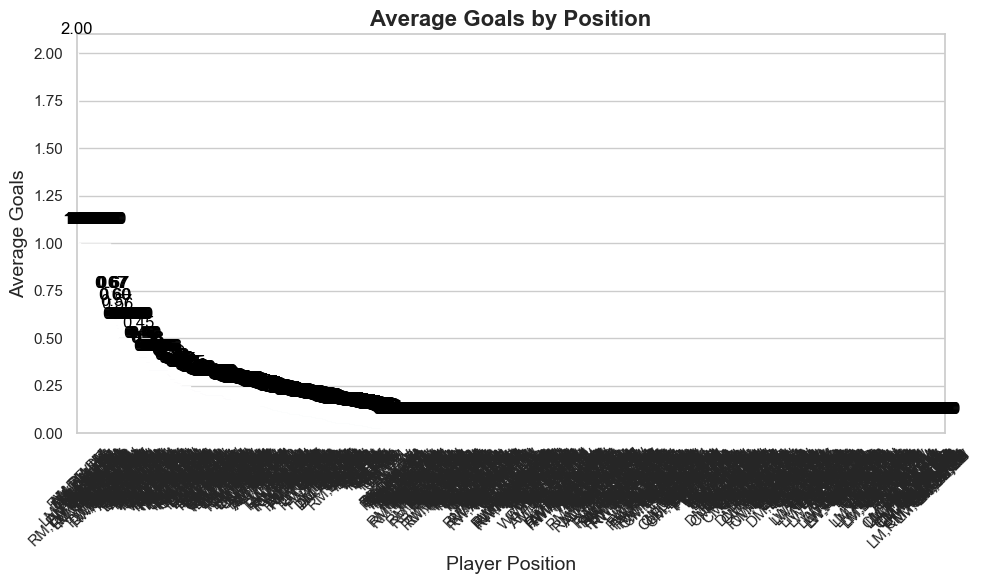

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Pos' and compute average goals
position_goals = df.groupby('Pos')['Gls'].mean().sort_values(ascending=False).reset_index()
print("Grouped Data:")
print(position_goals)

if position_goals.empty:
    print("Grouped data is still empty. Please recheck your CSV file and filtering conditions.")
else:
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")

    ax = sns.barplot(data=position_goals, x='Pos', y='Gls', palette="viridis")
    ax.set_title("Average Goals by Position", fontsize=16, weight="bold")
    ax.set_xlabel("Player Position", fontsize=14)
    ax.set_ylabel("Average Goals", fontsize=14)
    plt.xticks(rotation=45)

    for index, row in position_goals.iterrows():
        ax.text(index, row['Gls'] + 0.1, f"{row['Gls']:.2f}", color='black', ha="center", fontsize=12)

    plt.tight_layout()
    plt.show()


In [97]:
# Convert position to string, strip whitespace, and uppercase for consistency
df['Pos'] = df['Pos'].astype(str).str.strip().str.upper()

# If a row lists multiple positions separated by commas, keep only the first
df['Pos'] = df['Pos'].apply(lambda x: x.split(',')[0])

# Drop any rows where Pos is null or empty (if they exist)
df = df[df['Pos'].notnull() & (df['Pos'] != '')]

In [98]:
df['Gls'] = pd.to_numeric(df['Gls'], errors='coerce')


In [99]:
position_goals = (
    df.groupby('Pos')['Gls']
      .mean()
      .reset_index()
      .sort_values(by='Gls', ascending=True)  # Sort ascending for a nice bottom-to-top bar chart
)


/var/folders/ry/_rlmkzcs5rz9551rxcwt1cjc0000gn/T/ipykernel_10152/3791687755.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=position_goals, x='Gls', y='Pos', palette="viridis")
posx and posy should be finite values
posx and posy should be finite values


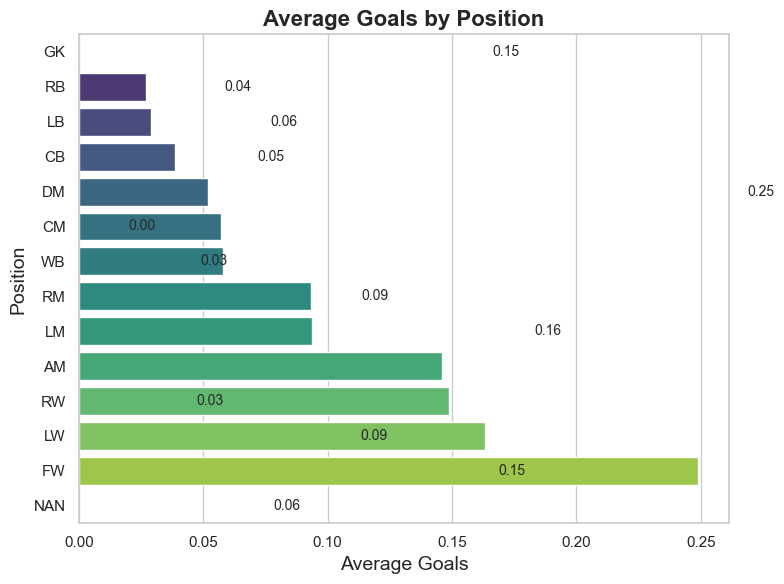

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=position_goals, x='Gls', y='Pos', palette="viridis")

# Title and labels
ax.set_title("Average Goals by Position", fontsize=16, weight="bold")
ax.set_xlabel("Average Goals", fontsize=14)
ax.set_ylabel("Position", fontsize=14)

# Add data labels to the right of each bar
for index, row in position_goals.iterrows():
    ax.text(
        x=row['Gls'] + 0.02,  # Slight offset so the text isn't on top of the bar
        y=index,
        s=f"{row['Gls']:.2f}",
        va='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/Users/ysk/Desktop/fullfutbolcsv/all-csv-player copy.csv', header=0)


# Remove aggregated rows (e.g., "15 Players")
df = df[df["Player"] != "15 Players"]

In [74]:
gk_columns = ["Saves", "Save%", "PSxG", "Cmp_y", "Att_y", "Cmp%_y", "Att (GK)", "Thr", "Launch%", "AvgLen"]
df[gk_columns] = df[gk_columns].fillna(0)

In [75]:
def convert_age(age_str):
    if isinstance(age_str, str) and '-' in age_str:
        years, days = map(int, age_str.split('-'))
        return years + days / 365
    return np.nan

df["Age"] = df["Age"].apply(convert_age)

In [76]:
# Encode positions into broader categories (e.g., FW, MF, DF, GK)
position_map = {
    "FW": "Forward", "LW": "Forward", "RW": "Forward",
    "DM": "Midfielder", "AM": "Midfielder",
    "CB": "Defender", "LB": "Defender", "RB": "Defender",
    "GK": "Goalkeeper"
}
df["Pos_Category"] = df["Pos"].map(position_map)

# One-hot encode nation and position
df = pd.get_dummies(df, columns=["Nation", "Pos_Category"], drop_first=True)

In [77]:
print(df.describe())

          Unnamed: 0          id: 0          index              #  \
count  317110.000000  317110.000000  317110.000000  298531.000000   
mean    33103.756819    5029.258040       6.918423      18.173248   
std     20280.981173    3148.851813       4.274880      15.936639   
min         0.000000       0.000000       0.000000       0.000000   
25%     15993.000000    2320.000000       3.000000       8.000000   
50%     31909.000000    4790.000000       7.000000      15.000000   
75%     48512.000000    7607.000000      11.000000      24.000000   
max     78227.000000   11889.000000      21.000000      99.000000   

                 Age            Min            Gls            Ast  \
count  298549.000000  317106.000000  317074.000000  317074.000000   
mean       26.682563     121.021829       0.168424       0.116701   
std         4.171064     217.937099       0.529455       0.415489   
min        15.495890       1.000000       0.000000       0.000000   
25%        23.553425      45.0000

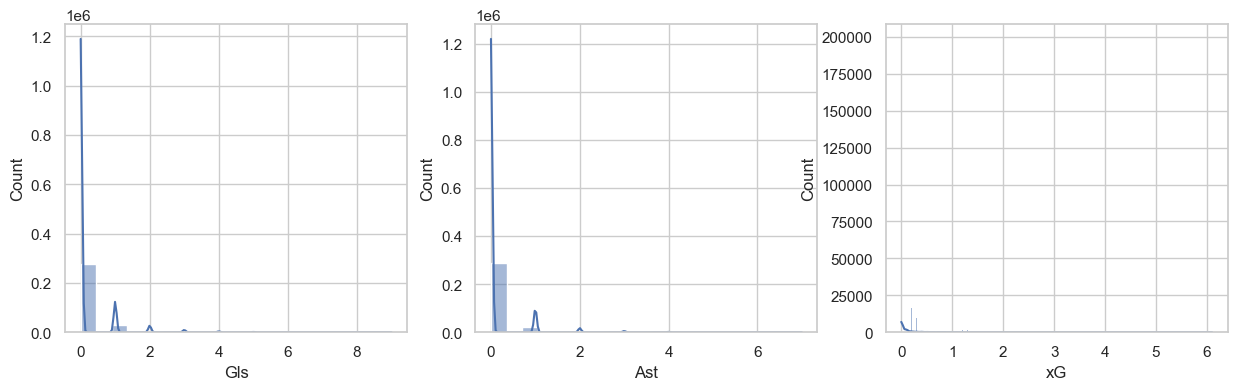

In [78]:
# Plot distributions for goals, assists, and xG
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df["Gls"], ax=axes[0], kde=True)
sns.histplot(df["Ast"], ax=axes[1], kde=True)
sns.histplot(df["xG"], ax=axes[2], kde=True)
plt.show()

In [79]:
# Convert columns to numeric (if needed)
numeric_cols = ['Age', 'Min', 'Gls', 'Ast', 'xG', 'npxG', 'xAG', 'SCA', 'GCA', 'Cmp_x', 'Att_x']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Impute or drop missing values
df = df.dropna()  # Or use imputation if dropping loses too much data.


In [80]:
print(df.columns.tolist())


['Unnamed: 0', 'id: 0', 'index', 'Player', '#', 'Pos', 'Age', 'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR', 'Touches', 'Tkl', 'Int', 'Blocks', 'xG', 'npxG', 'xAG', 'SCA', 'GCA', 'Cmp_x', 'Att_x', 'Cmp%_x', 'PrgP', 'Carries', 'PrgC', 'Att_x.1', 'Succ', 'SoTA', 'GA', 'Saves', 'Save%', 'PSxG', 'Cmp_y', 'Att_y', 'Cmp%_y', 'Att (GK)', 'Thr', 'Launch%', 'AvgLen', 'Att_y.1', 'Launch%.1', 'AvgLen.1', 'Opp', 'Stp', 'Stp%', '#OPA', 'AvgDist', 'home', 'game_id', 'Cmp', 'Att', 'Cmp%', 'Att.1', 'Nation_am ARM', 'Nation_ao ANG', 'Nation_ar ARG', 'Nation_at AUT', 'Nation_au AUS', 'Nation_ba BIH', 'Nation_be BEL', 'Nation_bf BFA', 'Nation_bg BUL', 'Nation_bi BDI', 'Nation_bj BEN', 'Nation_bm BER', 'Nation_bo BOL', 'Nation_br BRA', 'Nation_ca CAN', 'Nation_cd COD', 'Nation_cf CTA', 'Nation_cg CGO', 'Nation_ch SUI', 'Nation_ci CIV', 'Nation_cl CHI', 'Nation_cm CMR', 'Nation_cn CHN', 'Nation_co COL', 'Nation_cr CRC', 'Nation_cu CUB', 'Nation_cv CPV', 'Nation_cw CUW', 'Nation_cy CYP', '

In [81]:
# Remove rows where the Player column indicates summary data or is missing
df = df[df['Player'].str.contains("Players") == False]


In [82]:
df['Gls'] = pd.to_numeric(df['Gls'], errors='coerce')


In [83]:
position_goals = df.groupby('Pos')['Gls'].mean().sort_values(ascending=False).reset_index()
print(position_goals)


Empty DataFrame
Columns: [Pos, Gls]
Index: []


In [84]:
# Convert 'Gls' to numeric; any non-convertible value becomes NaN
df['Gls'] = pd.to_numeric(df['Gls'], errors='coerce')


In [85]:
# Filter out rows where the 'Player' column contains the word "Players"
df = df[~df['Player'].astype(str).str.contains("Players", na=False)]


In [86]:
print("After Filtering, DataFrame Head:")
print(df.head(10))


After Filtering, DataFrame Head:
Empty DataFrame
Columns: [Unnamed: 0, id: 0, index, Player, #, Pos, Age, Min, Gls, Ast, PK, PKatt, Sh, SoT, CrdY, CrdR, Touches, Tkl, Int, Blocks, xG, npxG, xAG, SCA, GCA, Cmp_x, Att_x, Cmp%_x, PrgP, Carries, PrgC, Att_x.1, Succ, SoTA, GA, Saves, Save%, PSxG, Cmp_y, Att_y, Cmp%_y, Att (GK), Thr, Launch%, AvgLen, Att_y.1, Launch%.1, AvgLen.1, Opp, Stp, Stp%, #OPA, AvgDist, home, game_id, Cmp, Att, Cmp%, Att.1, Nation_am ARM, Nation_ao ANG, Nation_ar ARG, Nation_at AUT, Nation_au AUS, Nation_ba BIH, Nation_be BEL, Nation_bf BFA, Nation_bg BUL, Nation_bi BDI, Nation_bj BEN, Nation_bm BER, Nation_bo BOL, Nation_br BRA, Nation_ca CAN, Nation_cd COD, Nation_cf CTA, Nation_cg CGO, Nation_ch SUI, Nation_ci CIV, Nation_cl CHI, Nation_cm CMR, Nation_cn CHN, Nation_co COL, Nation_cr CRC, Nation_cu CUB, Nation_cv CPV, Nation_cw CUW, Nation_cy CYP, Nation_cz CZE, Nation_de GER, Nation_dk DEN, Nation_do DOM, Nation_dz ALG, Nation_ec ECU, Nation_ee EST, Nation_eg EGY,

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Pos' and calculate mean of 'Gls'
position_goals = df.groupby('Pos')['Gls'].mean().sort_values(ascending=False).reset_index()
print("Grouped Data:")
print(position_goals)

# Check if the grouped DataFrame is empty
if position_goals.empty:
    print("No data available for plotting after grouping. Please check the CSV file and filtering conditions.")
else:
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")
    
    # Create the barplot using the DataFrame
    ax = sns.barplot(data=position_goals, x='Pos', y='Gls', palette="viridis")
    
    # Set title and axis labels
    ax.set_title("Average Goals by Position", fontsize=16, weight="bold")
    ax.set_xlabel("Player Position", fontsize=14)
    ax.set_ylabel("Average Goals", fontsize=14)
    plt.xticks(rotation=45)
    
    # Add data labels on top of each bar
    for index, row in position_goals.iterrows():
        ax.text(index, row['Gls'] + 0.1, f"{row['Gls']:.2f}", color='black', ha="center", fontsize=12)
    
    plt.tight_layout()
    plt.show()


Grouped Data:
Empty DataFrame
Columns: [Pos, Gls]
Index: []
No data available for plotting after grouping. Please check the CSV file and filtering conditions.


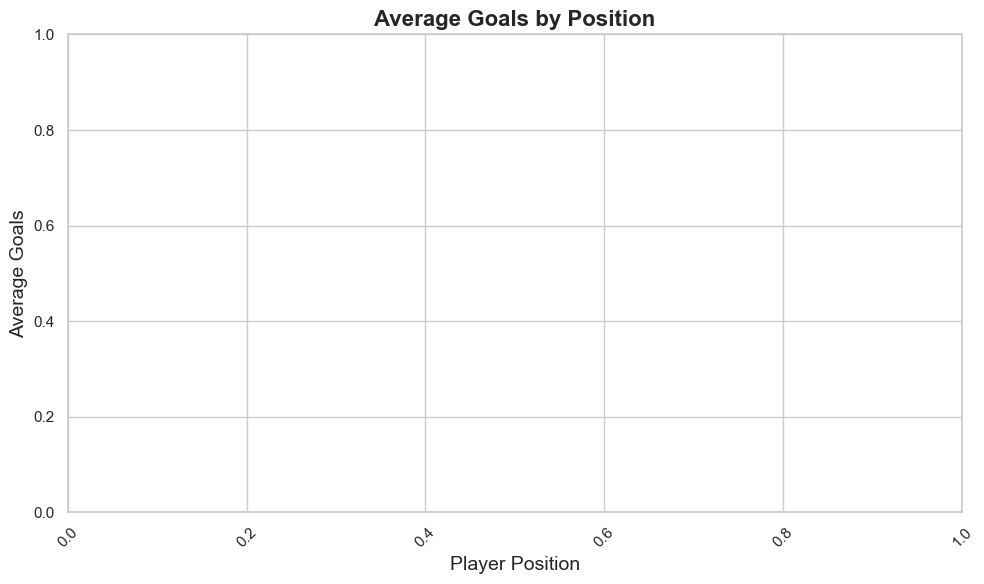

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute average goals by position and convert the Series to a DataFrame
position_goals = df.groupby('Pos')['Gls'].mean().sort_values(ascending=False).reset_index()
position_goals.columns = ['Pos', 'Gls']

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Use the DataFrame directly in the barplot
ax = sns.barplot(data=position_goals, x='Pos', y='Gls', palette="viridis")

# Set title and labels
ax.set_title("Average Goals by Position", fontsize=16, weight="bold")
ax.set_xlabel("Player Position", fontsize=14)
ax.set_ylabel("Average Goals", fontsize=14)
plt.xticks(rotation=45)

# Add data labels on top of each bar
for index, row in position_goals.iterrows():
    ax.text(index, row['Gls'] + 0.1, f"{row['Gls']:.2f}", color='black', ha="center", fontsize=12)

plt.tight_layout()
plt.show()


/Users/ysk/Library/Python/3.9/lib/python/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/ysk/Library/Python/3.9/lib/python/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


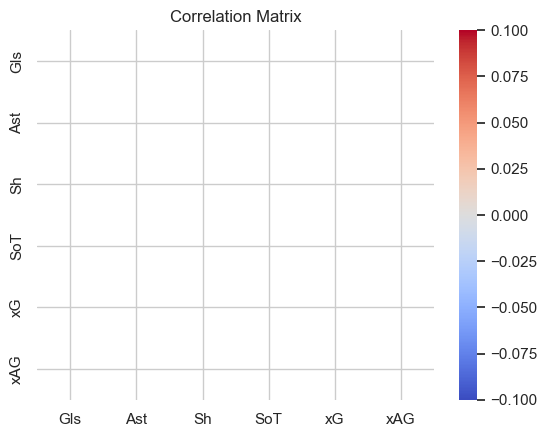

In [45]:
corr = df[["Gls", "Ast", "Sh", "SoT", "xG", "xAG"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

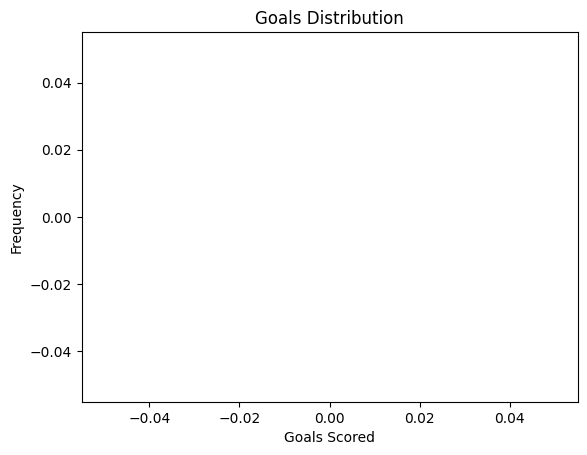

In [20]:
# Distribution of goals
sns.histplot(df['Gls'], bins=10, kde=True)
plt.title('Goals Distribution')
plt.xlabel('Goals Scored')
plt.ylabel('Frequency')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

# Drop irrelevant columns
X = df.drop(["Player", "Pos", "home", "game_id", "index", "#"], axis=1)
y = df["Pos"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [22]:
# After your existing preprocessing steps...

# 1. Convert percentage columns to numeric (handle "0 completion" cases)
df["Cmp%_x"] = pd.to_numeric(df["Cmp%_x"], errors="coerce").fillna(0)
df["Cmp%_y"] = pd.to_numeric(df["Cmp%_y"], errors="coerce").fillna(0)

# 2. Fill remaining NaNs for non-GK columns
non_gk_columns = df.columns.difference(gk_columns)
df[non_gk_columns] = df[non_gk_columns].fillna(0)

# 3. Verify no NaNs remain
print("Missing values after cleaning:", df.isnull().sum().sum())  # Should be 0

# 4. Convert all columns to numeric types
df = df.apply(pd.to_numeric, errors="ignore")

# 5. For categorical columns that might still have NaNs
df["Pos"] = df["Pos"].fillna("Unknown")

Missing values after cleaning: 0


/var/folders/ry/_rlmkzcs5rz9551rxcwt1cjc0000gn/T/ipykernel_10152/2029247198.py:15: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


In [23]:
negative_cols = ["Gls", "Ast", "Sh", "SoT"]
df[negative_cols] = df[negative_cols].clip(lower=0)

In [24]:
# Convert all values in the target column to strings
df["Pos_Category"] = df["Pos"].astype(str)

# Check unique values in the target variable
print("Unique position categories:", df["Pos_Category"].unique())

Unique position categories: []


In [25]:
# One-hot encode "Nation" only (not "Pos_Category")
df = pd.get_dummies(df, columns=["Nation"], drop_first=True)

KeyError: "None of [Index(['Nation'], dtype='object')] are in the [columns]"

In [26]:
# Check data type of the target column
print("Data type of Pos_Category:", df["Pos_Category"].dtype)

# Check for unexpected values (e.g., numbers or NaNs)
print("Sample values in Pos_Category:", df["Pos_Category"].head(3))

Data type of Pos_Category: object
Sample values in Pos_Category: Series([], Name: Pos_Category, dtype: object)


In [27]:
# Drop irrelevant columns (including original "Pos")
X = df.drop(["Player", "Pos", "home", "game_id", "index", "#", "Pos_Category"], axis=1)
y = df["Pos_Category"]  # Should now be purely categorical strings

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)  # No more TypeError!

NameError: name 'X_train' is not defined

In [30]:
# Use only players who are not goalkeepers
field_players = df[df["Pos_Category"] != "Goalkeeper"]
X = field_players.drop(["Gls", "Player", "Pos", "home", "game_id", "index", "#"], axis=1)
y = field_players["Gls"]

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values